In [24]:
#################################################
# SOLVENTS Dried PPM by Lot Number Last 2 Months
# TO DO SEPERATE FOR EACH SOLVENT - DONE
# SPLIT OUT DRIED AND RECEIVED
# UPPER CONTROL LIMIT AND LCL IN BLACK LINE
# SPECLIMIT IN RED LINE
# ORDER BY LN 
# SOLVENTS = XYLENE (done), IBIB, EP
# POWDERS = 'LB', 'LC', ('LI', 'LL')
#################################################

import sqlalchemy as sa
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sqlalchemy
import pyodbc
import pymssql
import plotly.express as px
from matplotlib.lines import Line2D  

%matplotlib inline

username = "superuser"
pw = "90rl()RL"
db = "SP_ManuLine"
port = "1433"
server = "192.168.14.119"

49.01363636363636


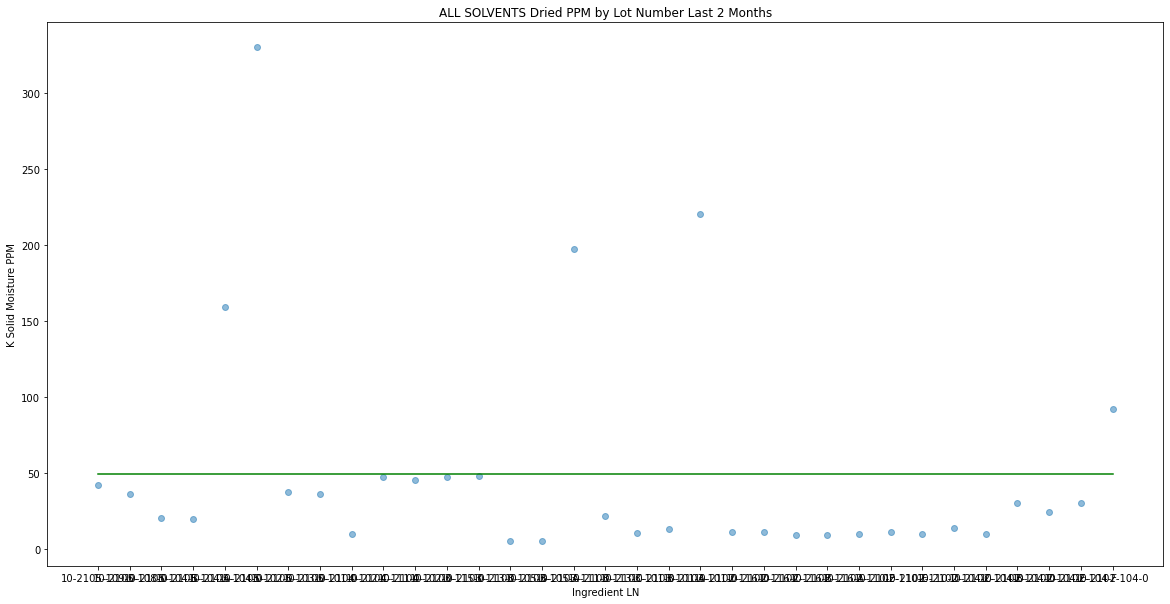

In [32]:
#####################################################################
# ALL SOLVENTS Dried PPM by Lot Number Last 2 Months for ALL SOLVENTS
#####################################################################
cnxn = pymssql.connect(server=server, user=username, password=pw, database=db)
cursor = cnxn.cursor(as_dict=True)

#query = "select * from dbo.drying"
#driedLiquidPPMQuery = "select * from drying where substring(partnr, 1,2) in ('XY', 'IB', 'EP')"
#driedLiquidPPMQuery = "select avgKSolidMoisture_ppm, d.* from drying d cross join (select avg(KSolidMoisture_ppm) avgKSolidMoisture_ppm from drying where substring(partnr, 1,2) in ('XY', 'IB', 'EP') ) a where substring(partnr, 1,2) in ('XY', 'IB', 'EP')"
#driedLiquidPPMQuery = "select avgKSolidMoisture_ppm, d.* from drying d cross join (select avg(KSolidMoisture_ppm) avgKSolidMoisture_ppm from drying where substring(partnr, 1,2) in ('XY', 'IB', 'EP') and entrydate >= dateadd(month, -2, getdate()) ) a where substring(partnr, 1,2) in ('XY', 'IB', 'EP') and entrydate >= dateadd(month, -2, getdate())"
months = -2
driedLiquidPPMQuery = "select avgKSolidMoisture_ppm, d.* \
                        from drying d cross join (\
                            select avg(KSolidMoisture_ppm) avgKSolidMoisture_ppm \
                            from drying where substring(partnr, 1,2) in ('XY', 'IB', 'EP') and entrydate >= dateadd(month, " + str(months) + ", getdate()) ) a \
                        where substring(partnr, 1,2) in ('XY', 'IB', 'EP') and entrydate >= dateadd(month, -2, getdate()) \
                        order by substring(ingredientln, 4, 4) desc"
                        #order by entrydate desc"

cursor.execute(driedLiquidPPMQuery)

df = pd.read_sql(driedLiquidPPMQuery, cnxn )

x = df.IngredientLN
y = df.KSolidMoisture_ppm
avg = df.avgKSolidMoisture_ppm
#avg = np.mean(df.KSolidMoisture_ppm)
print(np.mean(avg))

plt.figure(figsize=(20,10))
colors = np.random.rand(50)

plt.title('ALL SOLVENTS Dried PPM by Lot Number Last 2 Months')
plt.xlabel('Ingredient LN')
plt.ylabel('K Solid Moisture PPM')

#plt.Line2D(xdata=x, ydata=avg)
plt.plot(x, avg, "-", color="green")

plt.scatter(x, y, alpha=0.5)
plt.show()

cnxn.close()

14.087500000000002


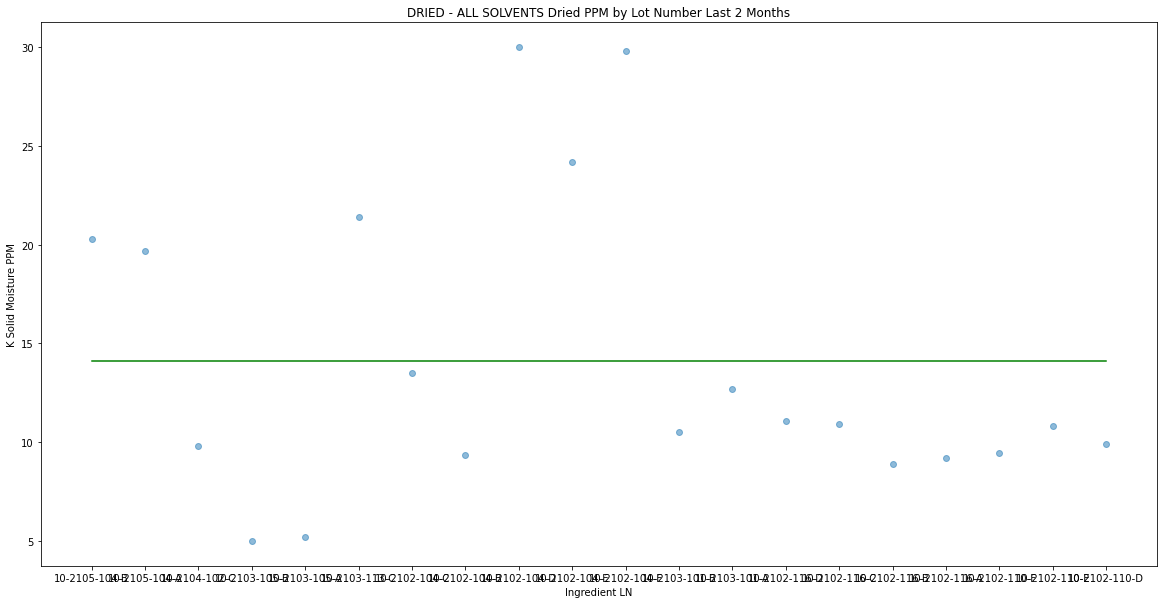

In [15]:
###################################################################################
# DRIED - ALL SOLVENTS Dried PPM by Lot Number Last 2 Months for ALL SOLVENTS 
###################################################################################

cnxn = pymssql.connect(server=server, user=username, password=pw, database=db)
cursor = cnxn.cursor(as_dict=True)

#query = "select * from dbo.drying"
#driedLiquidPPMQuery = "select * from drying where substring(partnr, 1,2) in ('XY', 'IB', 'EP')"
#driedLiquidPPMQuery = "select avgKSolidMoisture_ppm, d.* from drying d cross join (select avg(KSolidMoisture_ppm) avgKSolidMoisture_ppm from drying where substring(partnr, 1,2) in ('XY', 'IB', 'EP') ) a where substring(partnr, 1,2) in ('XY', 'IB', 'EP')"
#driedLiquidPPMQuery = "select avgKSolidMoisture_ppm, d.* from drying d cross join (select avg(KSolidMoisture_ppm) avgKSolidMoisture_ppm from drying where substring(partnr, 1,2) in ('XY', 'IB', 'EP') and entrydate >= dateadd(month, -2, getdate()) ) a where substring(partnr, 1,2) in ('XY', 'IB', 'EP') and entrydate >= dateadd(month, -2, getdate())"
driedLiquidPPMQuery = "select avgKSolidMoisture_ppm, d.* \
            from drying d cross join \
                (select avg(KSolidMoisture_ppm) avgKSolidMoisture_ppm \
                from drying  \
                where substring(partnr, 1,2) in ('XY', 'IB', 'EP') and entrydate >= dateadd(month, -2, getdate()) and substring(productpn, 9,2) = '00' ) a \
            where substring(partnr, 1,2) in ('XY', 'IB', 'EP') and entrydate >= dateadd(month, -2, getdate()) and substring(productpn, 9,2) = '00' \
            order by entrydate desc"
            #order by substring(ingredientln, 4, 4) desc"

cursor.execute(driedLiquidPPMQuery)

df = pd.read_sql(driedLiquidPPMQuery, cnxn )

x = df.IngredientLN
y = df.KSolidMoisture_ppm
avg = df.avgKSolidMoisture_ppm
#avg = np.mean(df.KSolidMoisture_ppm)
print(np.mean(avg))

#fig = plt.figure()
#ax = fig.add_subplot(111)
#line = Line2D(x, avg)
#ax.add_line(line)

plt.figure(figsize=(20,10))
colors = np.random.rand(50)

plt.title('DRIED - ALL SOLVENTS Dried PPM by Lot Number Last 2 Months')
plt.xlabel('Ingredient LN')
plt.ylabel('K Solid Moisture PPM')

#plt.Line2D(xdata=x, ydata=avg)
plt.plot(x, avg, "-", color="green")

plt.scatter(x, y, alpha=0.5)
plt.show()

cnxn.close()

102.74615384615389


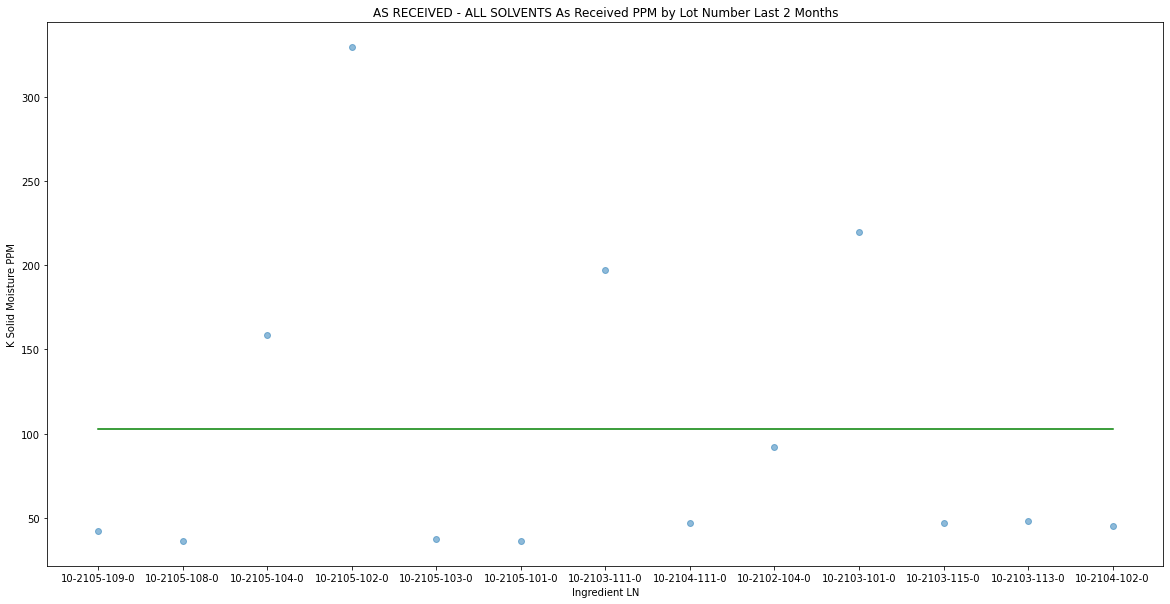

In [33]:
#################################################################################################
# RECEIVED - ALL SOLVENTS As Received PPM by Lot Number Last 2 Months for ALL SOLVENTS 
#################################################################################################
cnxn = pymssql.connect(server=server, user=username, password=pw, database=db)
cursor = cnxn.cursor(as_dict=True)

#query = "select * from dbo.drying"
#driedLiquidPPMQuery = "select * from drying where substring(partnr, 1,2) in ('XY', 'IB', 'EP')"
#driedLiquidPPMQuery = "select avgKSolidMoisture_ppm, d.* from drying d cross join (select avg(KSolidMoisture_ppm) avgKSolidMoisture_ppm from drying where substring(partnr, 1,2) in ('XY', 'IB', 'EP') ) a where substring(partnr, 1,2) in ('XY', 'IB', 'EP')"
#driedLiquidPPMQuery = "select avgKSolidMoisture_ppm, d.* from drying d cross join (select avg(KSolidMoisture_ppm) avgKSolidMoisture_ppm from drying where substring(partnr, 1,2) in ('XY', 'IB', 'EP') and entrydate >= dateadd(month, -2, getdate()) ) a where substring(partnr, 1,2) in ('XY', 'IB', 'EP') and entrydate >= dateadd(month, -2, getdate())"
driedLiquidPPMQuery = "select avgKSolidMoisture_ppm, d.* \
                        from drying d cross join ( \
                            select avg(KSolidMoisture_ppm) avgKSolidMoisture_ppm \
                            from drying \
                            where substring(partnr, 1,2) in ('XY', 'IB', 'EP') and entrydate >= dateadd(month, -2, getdate()) \
                            and substring(productpn, 9,2) = '19' ) a \
                        where substring(partnr, 1,2) in ('XY', 'IB', 'EP') and entrydate >= dateadd(month, -2, getdate()) and substring(productpn, 9,2) = '19' \
                        order by entrydate desc"
                        #order by substring(ingredientln, 4, 4) desc"

cursor.execute(driedLiquidPPMQuery)

df = pd.read_sql(driedLiquidPPMQuery, cnxn )

x = df.IngredientLN
y = df.KSolidMoisture_ppm
avg = df.avgKSolidMoisture_ppm
#avg = np.mean(df.KSolidMoisture_ppm)
print(np.mean(avg))

plt.figure(figsize=(20,10))
colors = np.random.rand(50)

plt.title('AS RECEIVED - ALL SOLVENTS As Received PPM by Lot Number Last 2 Months')
plt.xlabel('Ingredient LN')
plt.ylabel('K Solid Moisture PPM')

#plt.Line2D(xdata=x, ydata=avg)
plt.plot(x, avg, "-", color="green")

plt.scatter(x, y, alpha=0.5)
plt.show()

cnxn.close()

23.668421052631576


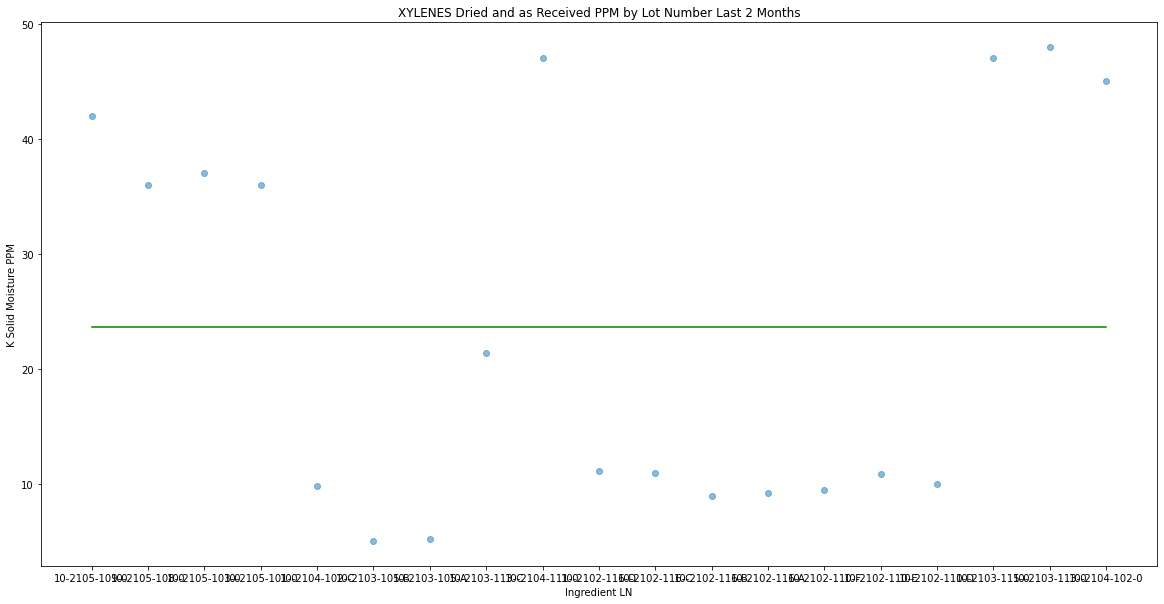

In [20]:
#####################################################################
# All XYLENES Dried and as Received PPM by Lot Number Last 2 Months 
#####################################################################
cnxn = pymssql.connect(server=server, user=username, password=pw, database=db)
cursor = cnxn.cursor(as_dict=True)

driedLiquidPPMQuery = "select avgKSolidMoisture_ppm, d.* \
                        from drying d cross join ( \
                            select avg(KSolidMoisture_ppm) avgKSolidMoisture_ppm \
                            from drying where substring(partnr, 1,2) in ('XY') and entrydate >= dateadd(month, -2, getdate()) ) a \
                        where substring(partnr, 1,2) in ('XY') and entrydate >= dateadd(month, -2, getdate()) \
                        order by entrydate desc"

cursor.execute(driedLiquidPPMQuery)

df = pd.read_sql(driedLiquidPPMQuery, cnxn )

x = df.IngredientLN
y = df.KSolidMoisture_ppm
avg = df.avgKSolidMoisture_ppm
#avg = np.mean(df.KSolidMoisture_ppm)
print(np.mean(avg))

plt.figure(figsize=(20,10))
colors = np.random.rand(50)

plt.title('XYLENES Dried and as Received PPM by Lot Number Last 2 Months')
plt.xlabel('Ingredient LN')
plt.ylabel('K Solid Moisture PPM')

#plt.Line2D(xdata=x, ydata=avg)
plt.plot(x, avg, "-", color="green")

plt.scatter(x, y, alpha=0.5)
plt.show()

cnxn.close()

10.154545454545454


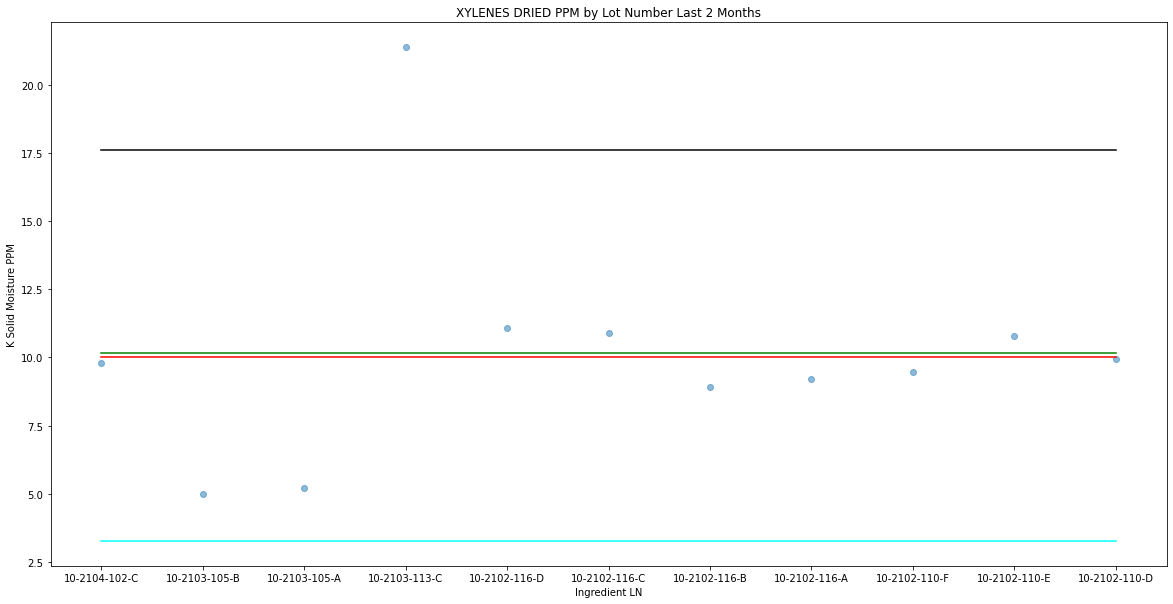

In [87]:
#####################################################################
# XYLENES DRIED PPM by Lot Number Last 2 Months 
#####################################################################
cnxn = pymssql.connect(server=server, user=username, password=pw, database=db)
cursor = cnxn.cursor(as_dict=True)

driedLiquidPPMQuery = "select avgKSolidMoisture_ppm, d.* \
                        from drying d cross join ( \
                            select avg(KSolidMoisture_ppm) avgKSolidMoisture_ppm \
                            from drying \
                            where substring(partnr, 1,2) in ('XY') and entrydate >= dateadd(month, -2, getdate()) \
                            and substring(productpn, 9,2) = '00' ) a \
                        where substring(partnr, 1,2) in ('XY') and entrydate >= dateadd(month, -2, getdate()) and substring(productpn, 9,2) = '00' \
                        order by entrydate desc"

cursor.execute(driedLiquidPPMQuery)

df = pd.read_sql(driedLiquidPPMQuery, cnxn )

x = df.IngredientLN
y = df.KSolidMoisture_ppm
avg = df.avgKSolidMoisture_ppm
#avg = np.mean(df.KSolidMoisture_ppm)
print(np.mean(avg))

plt.figure(figsize=(20,10))
colors = np.random.rand(50)

plt.title('XYLENES DRIED PPM by Lot Number Last 2 Months')
plt.xlabel('Ingredient LN')
plt.ylabel('K Solid Moisture PPM')

#plt.Line2D(xdata=x, ydata=avg)
plt.plot(x, avg, "-", color="green")

# SPEC LINE
plt.plot([0, len(df)-1], [10, 10], "-", color="red")

# UPPER CONTROL LIMIT
plt.plot([0, len(df)-1], [17.61, 17.61], "-", color="black")

# LOWER CONTROL LIMIT
plt.plot([0, len(df)-1], [3.26, 3.26], "-", color="cyan")

plt.scatter(x, y, alpha=0.5)
plt.show()

cnxn.close()

In [43]:
print(len(df))

11


42.25


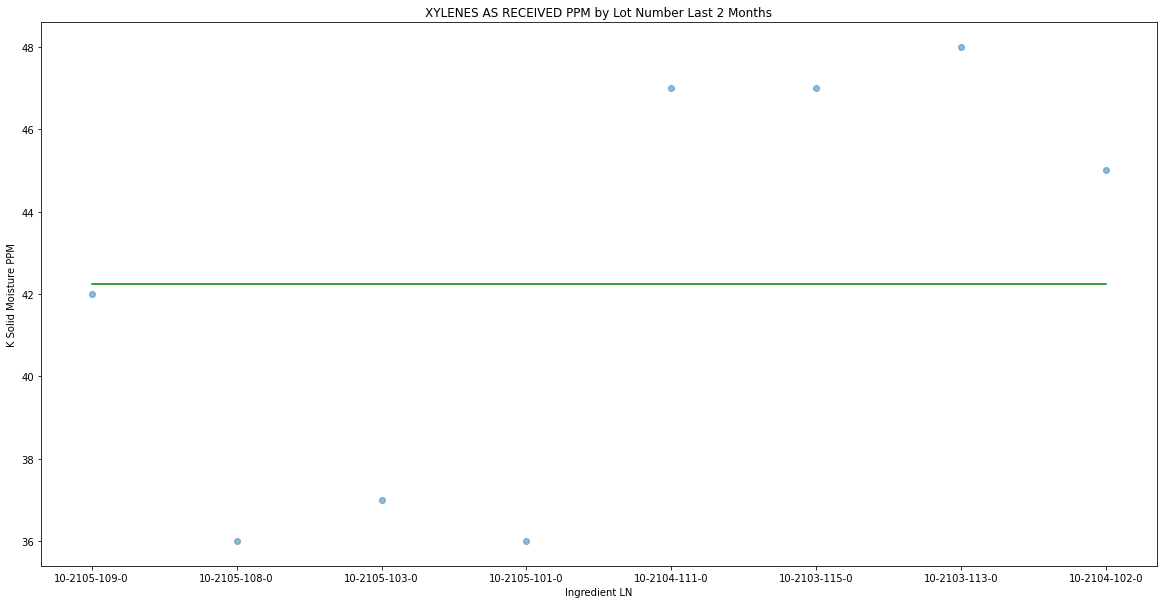

In [22]:
#####################################################################
# XYLENES AS RECEIVED PPM by Lot Number Last 2 Months 
#####################################################################
cnxn = pymssql.connect(server=server, user=username, password=pw, database=db)
cursor = cnxn.cursor(as_dict=True)

driedLiquidPPMQuery = "select avgKSolidMoisture_ppm, d.* \
                        from drying d cross join ( \
                            select avg(KSolidMoisture_ppm) avgKSolidMoisture_ppm \
                            from drying \
                            where substring(partnr, 1,2) in ('XY') and entrydate >= dateadd(month, -2, getdate()) \
                            and substring(productpn, 9,2) = '19' ) a \
                        where substring(partnr, 1,2) in ('XY') and entrydate >= dateadd(month, -2, getdate()) and substring(productpn, 9,2) = '19' \
                        order by entrydate desc"

cursor.execute(driedLiquidPPMQuery)

df = pd.read_sql(driedLiquidPPMQuery, cnxn )

x = df.IngredientLN
y = df.KSolidMoisture_ppm
avg = df.avgKSolidMoisture_ppm
#avg = np.mean(df.KSolidMoisture_ppm)
print(np.mean(avg))

#fig = plt.figure()
#ax = fig.add_subplot(111)
#line = Line2D(x, avg)
#ax.add_line(line)

plt.figure(figsize=(20,10))
colors = np.random.rand(50)

plt.title('XYLENES AS RECEIVED PPM by Lot Number Last 2 Months')
plt.xlabel('Ingredient LN')
plt.ylabel('K Solid Moisture PPM')

#plt.Line2D(xdata=x, ydata=avg)
plt.plot(x, avg, "-", color="green")

plt.scatter(x, y, alpha=0.5)
plt.show()

cnxn.close()

154.04000000000002


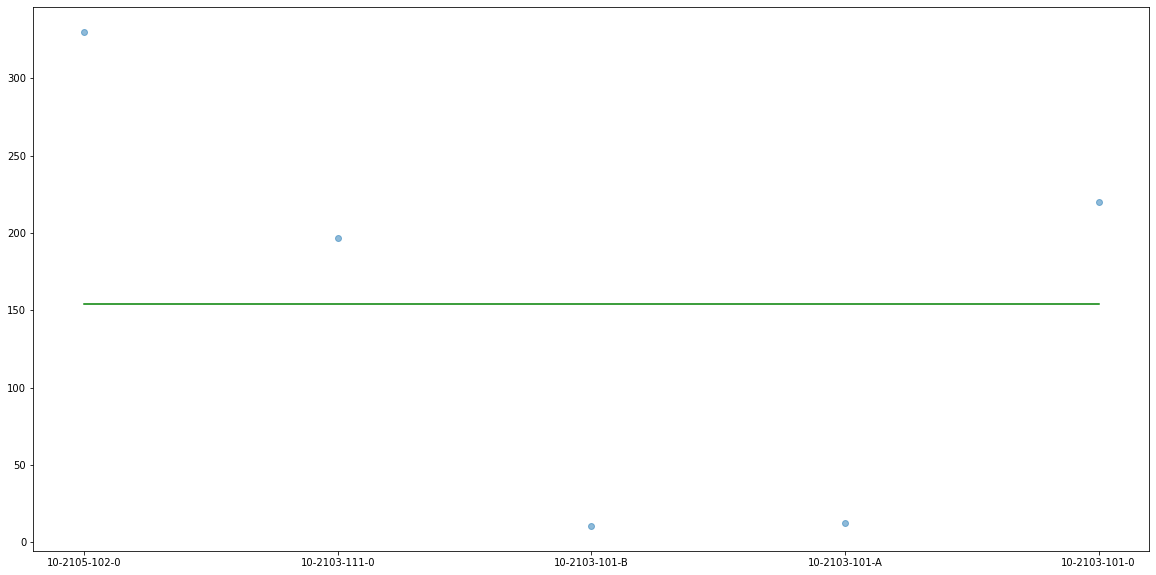

In [11]:
#####################################################################
# EP DRIED AND RECEIVED PPM by Lot Number Last 2 Months for 
#####################################################################

#STOPPED HERE
#STOPPED HERE

cnxn = pymssql.connect(server=server, user=username, password=pw, database=db)
cursor = cnxn.cursor(as_dict=True)

driedLiquidPPMQuery = "select avgKSolidMoisture_ppm, d.* from drying d cross join (select avg(KSolidMoisture_ppm) avgKSolidMoisture_ppm from drying where substring(partnr, 1,2) in ('EP') and entrydate >= dateadd(month, -2, getdate()) ) a where substring(partnr, 1,2) in ('EP') and entrydate >= dateadd(month, -2, getdate())"
cursor.execute(driedLiquidPPMQuery)

df = pd.read_sql(driedLiquidPPMQuery, cnxn )

x = df.IngredientLN
y = df.KSolidMoisture_ppm
avg = df.avgKSolidMoisture_ppm
#avg = np.mean(df.KSolidMoisture_ppm)
print(np.mean(avg))

#fig = plt.figure()
#ax = fig.add_subplot(111)
#line = Line2D(x, avg)
#ax.add_line(line)

plt.figure(figsize=(20,10))
colors = np.random.rand(50)

#plt.Line2D(xdata=x, ydata=avg)
plt.plot(x, avg, "-", color="green")

plt.scatter(x, y, alpha=0.5)
plt.show()

cnxn.close()

44.172222222222224


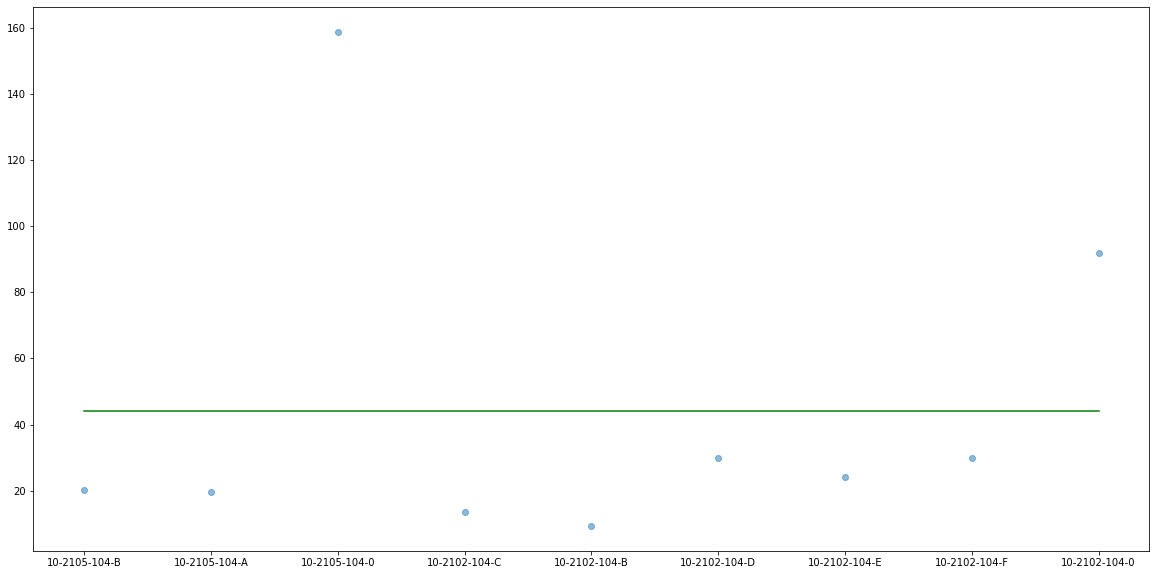

In [59]:
#####################################################################
# IB DRIED AND RECEIVED PPM by Lot Number Last 2 Months for 
#####################################################################

#STOPPED HERE
#STOPPED HERE

cnxn = pymssql.connect(server=server, user=username, password=pw, database=db)
cursor = cnxn.cursor(as_dict=True)

driedLiquidPPMQuery = "select avgKSolidMoisture_ppm, d.* from drying d cross join (select avg(KSolidMoisture_ppm) avgKSolidMoisture_ppm from drying where substring(partnr, 1,2) in ('IB') and entrydate >= dateadd(month, -2, getdate()) ) a where substring(partnr, 1,2) in ('IB') and entrydate >= dateadd(month, -2, getdate())"
cursor.execute(driedLiquidPPMQuery)

df = pd.read_sql(driedLiquidPPMQuery, cnxn )

x = df.IngredientLN
y = df.KSolidMoisture_ppm
avg = df.avgKSolidMoisture_ppm
#avg = np.mean(df.KSolidMoisture_ppm)
print(np.mean(avg))

#fig = plt.figure()
#ax = fig.add_subplot(111)
#line = Line2D(x, avg)
#ax.add_line(line)

plt.figure(figsize=(20,10))
colors = np.random.rand(50)

#plt.Line2D(xdata=x, ydata=avg)
plt.plot(x, avg, "-", color="green")
#plt.plot([0], [])

plt.scatter(x, y, alpha=0.5)
plt.show()

cnxn.close()

210.00333333333333


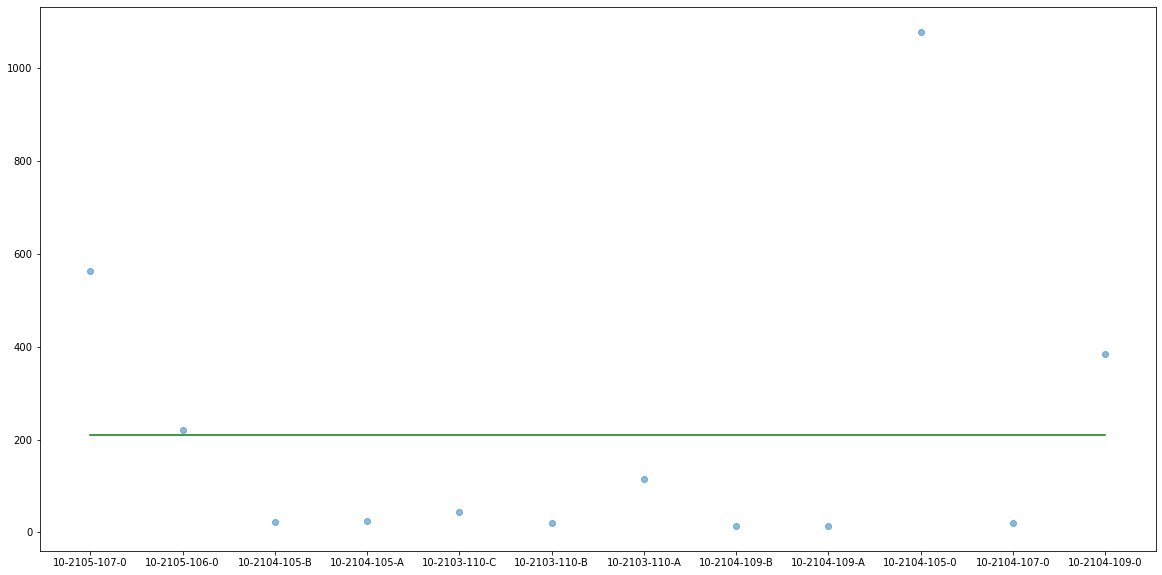

In [150]:
#################################################
# ALL POWDER Dried PPM by Lot Number last 2 months
# SEP FOR EACH POWDER
# REMOVE LI AND LB
#################################################
cnxn = pymssql.connect(server=server, user=username, password=pw, database=db)
cursor1 = cnxn.cursor(as_dict=True)

driedPowderPPMQuery = "select avgKSolidMoisture_ppm, d.* from drying d cross join (select avg(KSolidMoisture_ppm) avgKSolidMoisture_ppm from drying where substring(partnr, 1,2) in ('LB', 'LC', 'LI', 'LL') and entrydate >= dateadd(month, -2, getdate()) ) a where substring(partnr, 1,2) in ('LB', 'LC', 'LI', 'LL') and entrydate >= dateadd(month, -2, getdate())"
cursor1.execute(driedPowderPPMQuery)
dfpowder = pd.read_sql(driedPowderPPMQuery, cnxn )

x = dfpowder.IngredientLN
y = dfpowder.KSolidMoisture_ppm
avg = dfpowder.avgKSolidMoisture_ppm
#avg = np.mean(df.KSolidMoisture_ppm)
print(np.mean(avg))

plt.figure(figsize=(20,10))
colors = np.random.rand(50)

#plt.Line2D(xdata=x, ydata=avg)
plt.plot(x, avg, "-", color="green")

plt.scatter(x, y, alpha=0.5)
plt.show()

cnxn.close()

266.6342857142858


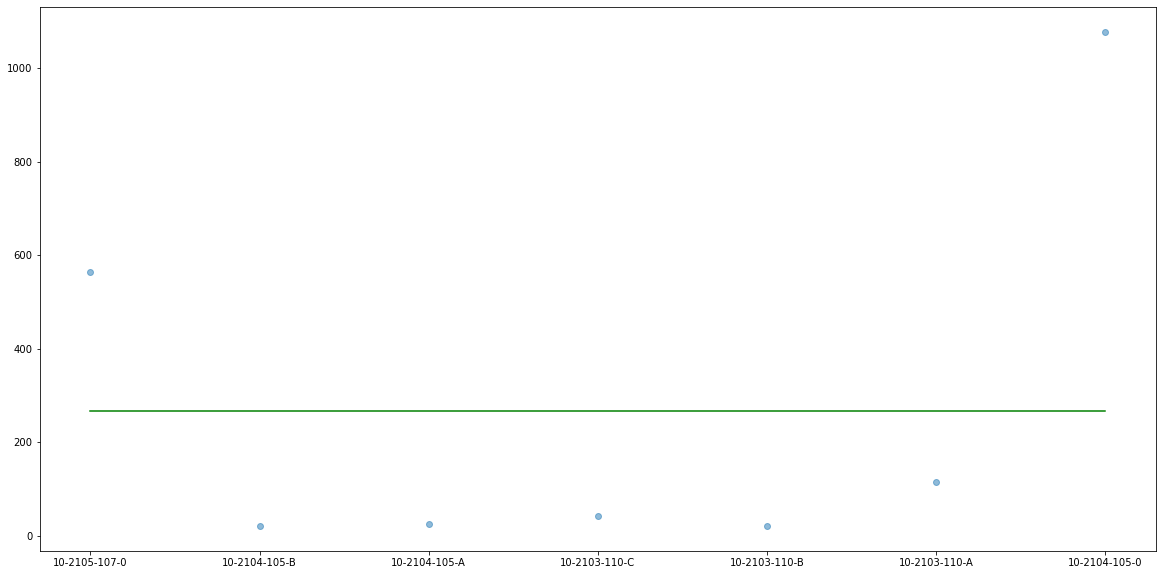

In [12]:
##################################################################################################
# LB Lithium Bromide POWDER Dried PPM by Lot Number last 2 months
##################################################################################################

cnxn = pymssql.connect(server=server, user=username, password=pw, database=db)
cursor1 = cnxn.cursor(as_dict=True)

driedPowderPPMQuery = "select avgKSolidMoisture_ppm, d.* from drying d cross join (select avg(KSolidMoisture_ppm) avgKSolidMoisture_ppm from drying where substring(partnr, 1,2) in ('LB') and entrydate >= dateadd(month, -2, getdate()) ) a where substring(partnr, 1,2) in ('LB') and entrydate >= dateadd(month, -2, getdate())"
cursor1.execute(driedPowderPPMQuery)
dfpowder = pd.read_sql(driedPowderPPMQuery, cnxn )

x = dfpowder.IngredientLN
y = dfpowder.KSolidMoisture_ppm
avg = dfpowder.avgKSolidMoisture_ppm
#avg = np.mean(df.KSolidMoisture_ppm)
print(np.mean(avg))

plt.figure(figsize=(20,10))
colors = np.random.rand(50)

#plt.Line2D(xdata=x, ydata=avg)
plt.plot(x, avg, "-", color="green")

plt.scatter(x, y, alpha=0.5)
plt.show()

cnxn.close()

130.72


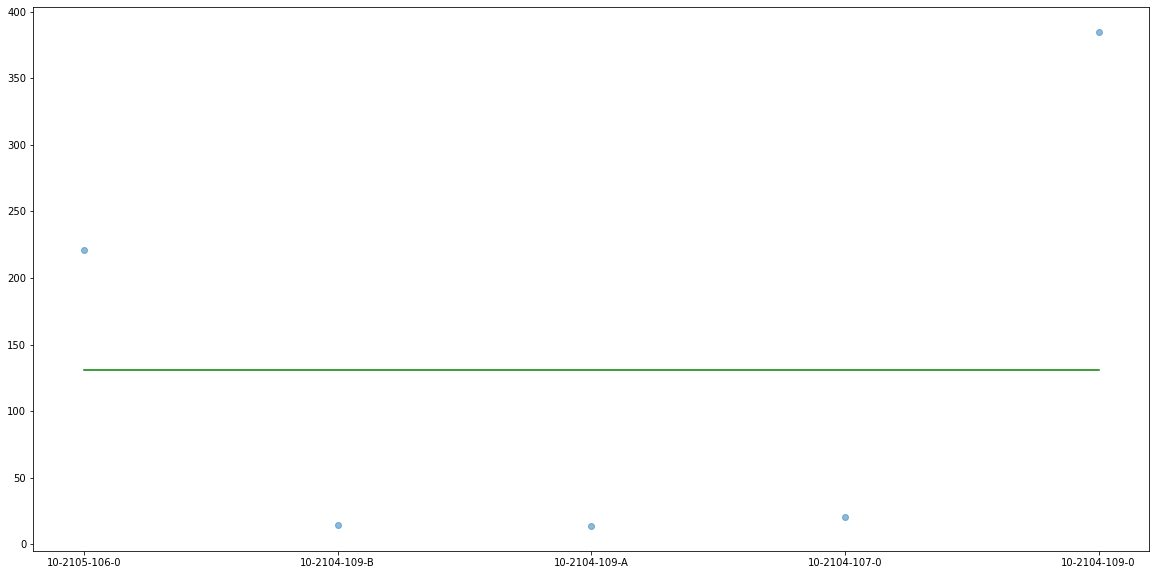

In [14]:
##################################################################################################
# LC Lithium Chromide POWDER Dried PPM by Lot Number last 2 months
##################################################################################################

cnxn = pymssql.connect(server=server, user=username, password=pw, database=db)
cursor1 = cnxn.cursor(as_dict=True)

driedPowderPPMQuery = "select avgKSolidMoisture_ppm, d.* from drying d cross join (select avg(KSolidMoisture_ppm) avgKSolidMoisture_ppm from drying where substring(partnr, 1,2) in ('LC') and entrydate >= dateadd(month, -2, getdate()) ) a where substring(partnr, 1,2) in ('LC') and entrydate >= dateadd(month, -2, getdate())"
cursor1.execute(driedPowderPPMQuery)
dfpowder = pd.read_sql(driedPowderPPMQuery, cnxn )

x = dfpowder.IngredientLN
y = dfpowder.KSolidMoisture_ppm
avg = dfpowder.avgKSolidMoisture_ppm
#avg = np.mean(df.KSolidMoisture_ppm)
print(np.mean(avg))

plt.figure(figsize=(20,10))
colors = np.random.rand(50)

#plt.Line2D(xdata=x, ydata=avg)
plt.plot(x, avg, "-", color="green")

plt.scatter(x, y, alpha=0.5)
plt.show()

cnxn.close()

nan


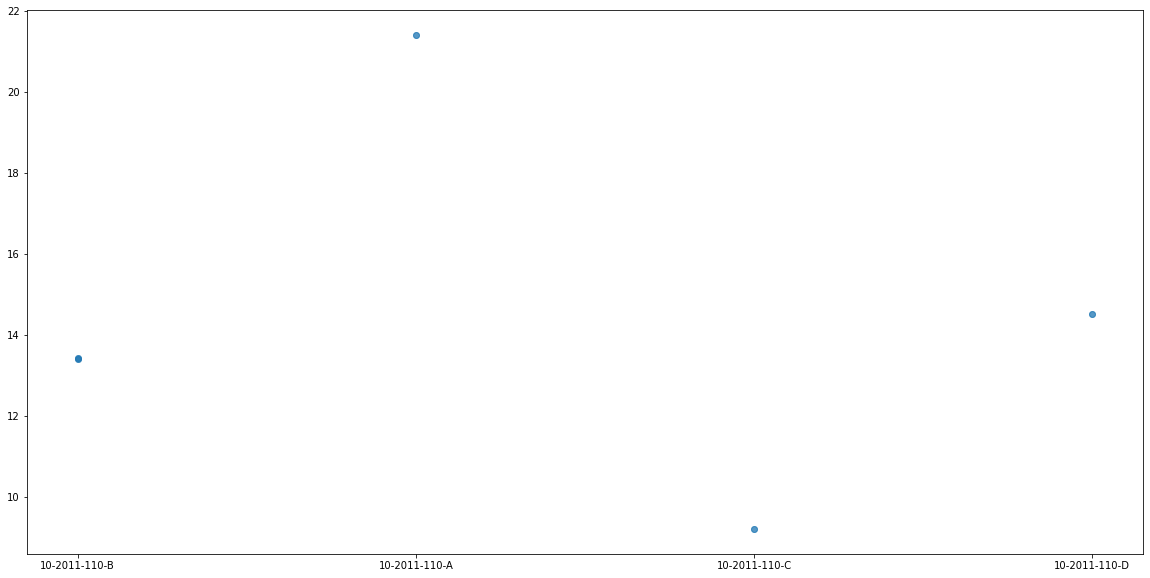

In [19]:
##################################################################################################
# LI (LL) Lithium Iodide POWDER Dried PPM by Lot Number last 6 months
##################################################################################################

cnxn = pymssql.connect(server=server, user=username, password=pw, database=db)
cursor1 = cnxn.cursor(as_dict=True)

driedPowderPPMQuery = "select avgKSolidMoisture_ppm, d.* from drying d cross join (select avg(KSolidMoisture_ppm) avgKSolidMoisture_ppm from drying where substring(partnr, 1,2) in ('LI', 'LL') and entrydate >= dateadd(month, -2, getdate()) ) a where substring(partnr, 1,2) in ('LL', 'LI') and entrydate >= dateadd(month, -6, getdate())"
cursor1.execute(driedPowderPPMQuery)
dfpowder = pd.read_sql(driedPowderPPMQuery, cnxn )

x = dfpowder.IngredientLN
y = dfpowder.KSolidMoisture_ppm
avg = dfpowder.avgKSolidMoisture_ppm
#avg = np.mean(df.KSolidMoisture_ppm)
print(np.mean(avg))

plt.figure(figsize=(20,10))
colors = np.random.rand(50)

#plt.Line2D(xdata=x, ydata=avg)
plt.plot(x, avg, "-", color="green")

plt.scatter(x, y, alpha=0.5)
plt.show()

cnxn.close()

In [148]:
cnxn.close()